In [1]:
pip install numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [1]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt

def simulate_erosion(D, v, x_len, t_len, dx, dt):
    x = np.arange(0, x_len + dx, dx)
    t = np.arange(0, t_len + dt, dt)
    u = np.zeros((len(x), len(t)))

    # Initial condition: initial coastline
    u[:, 0] = np.sin(np.pi * x / x_len)

    # Finite difference method
    for n in range(0, len(t) - 1):
        for i in range(1, len(x) - 1):
            u[i, n+1] = u[i, n] + D * dt / dx**2 * (u[i+1, n] - 2*u[i, n] + u[i-1, n]) - v * dt / (2*dx) * (u[i+1, n] - u[i-1, n])

    return x, t, u

def plot_erosion(x, t, u):
    plt.figure(figsize=(10, 6))
    for n in range(0, len(t), len(t) // 10):
        plt.plot(x, u[:, n], label=f't={t[n]:.2f}')
    plt.xlabel('Position along the coastline')
    plt.ylabel('Coastline position')
    plt.title('Coastline Erosion over Time')
    plt.legend()
    plt.show()

def run_simulation():
    try:
        D = float(D_entry.get())
        v = float(v_entry.get())
        x_len = float(x_len_entry.get())
        t_len = float(t_len_entry.get())
        dx = float(dx_entry.get())
        dt = float(dt_entry.get())

        x, t, u = simulate_erosion(D, v, x_len, t_len, dx, dt)
        plot_erosion(x, t, u)
    except ValueError:
        print("Please enter valid numerical values")

# Create the main window
root = tk.Tk()
root.title("Coastline Erosion Simulation")

# Create input fields
ttk.Label(root, text="Diffusion Coefficient (D):").grid(column=0, row=0, padx=10, pady=5)
D_entry = ttk.Entry(root)
D_entry.grid(column=1, row=0, padx=10, pady=5)

ttk.Label(root, text="Advection Speed (v):").grid(column=0, row=1, padx=10, pady=5)
v_entry = ttk.Entry(root)
v_entry.grid(column=1, row=1, padx=10, pady=5)

ttk.Label(root, text="Coastline Length (x_len):").grid(column=0, row=2, padx=10, pady=5)
x_len_entry = ttk.Entry(root)
x_len_entry.grid(column=1, row=2, padx=10, pady=5)

ttk.Label(root, text="Simulation Time (t_len):").grid(column=0, row=3, padx=10, pady=5)
t_len_entry = ttk.Entry(root)
t_len_entry.grid(column=1, row=3, padx=10, pady=5)

ttk.Label(root, text="Spatial Step Size (dx):").grid(column=0, row=4, padx=10, pady=5)
dx_entry = ttk.Entry(root)
dx_entry.grid(column=1, row=4, padx=10, pady=5)

ttk.Label(root, text="Time Step Size (dt):").grid(column=0, row=5, padx=10, pady=5)
dt_entry = ttk.Entry(root)
dt_entry.grid(column=1, row=5, padx=10, pady=5)

# Create the run button
run_button = ttk.Button(root, text="Run Simulation", command=run_simulation)
run_button.grid(column=0, row=6, columnspan=2, pady=10)

# Start the GUI event loop
root.mainloop()


In [3]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt

def simulate_traffic_flow(rho_max, v_max, x_len, t_len, dx, dt):
    x = np.arange(0, x_len + dx, dx)
    t = np.arange(0, t_len + dt, dt)
    rho = np.zeros((len(x), len(t)))

    # Initial condition: initial traffic density
    rho[:, 0] = rho_max * np.sin(np.pi * x / x_len)

    # Finite difference method
    for n in range(0, len(t) - 1):
        for i in range(1, len(x) - 1):
            flux = rho[i, n] * v_max * (1 - rho[i, n] / rho_max)
            rho[i, n+1] = rho[i, n] - dt / dx * (flux - rho[i-1, n] * v_max * (1 - rho[i-1, n] / rho_max))

    return x, t, rho

def plot_traffic_flow(x, t, rho):
    plt.figure(figsize=(10, 6))
    for n in range(0, len(t), len(t) // 10):
        plt.plot(x, rho[:, n], label=f't={t[n]:.2f}')
    plt.xlabel('Position along the road')
    plt.ylabel('Traffic density')
    plt.title('Traffic Density over Time')
    plt.legend()
    plt.show()

def run_simulation():
    try:
        rho_max = float(rho_max_entry.get())
        v_max = float(v_max_entry.get())
        x_len = float(x_len_entry.get())
        t_len = float(t_len_entry.get())
        dx = float(dx_entry.get())
        dt = float(dt_entry.get())

        x, t, rho = simulate_traffic_flow(rho_max, v_max, x_len, t_len, dx, dt)
        plot_traffic_flow(x, t, rho)
    except ValueError:
        print("Please enter valid numerical values")

# Create the main window
root = tk.Tk()
root.title("Traffic Flow Simulation")

# Create input fields
ttk.Label(root, text="Maximum Traffic Density (rho_max):").grid(column=0, row=0, padx=10, pady=5)
rho_max_entry = ttk.Entry(root)
rho_max_entry.grid(column=1, row=0, padx=10, pady=5)

ttk.Label(root, text="Maximum Speed (v_max):").grid(column=0, row=1, padx=10, pady=5)
v_max_entry = ttk.Entry(root)
v_max_entry.grid(column=1, row=1, padx=10, pady=5)

ttk.Label(root, text="Road Length (x_len):").grid(column=0, row=2, padx=10, pady=5)
x_len_entry = ttk.Entry(root)
x_len_entry.grid(column=1, row=2, padx=10, pady=5)

ttk.Label(root, text="Simulation Time (t_len):").grid(column=0, row=3, padx=10, pady=5)
t_len_entry = ttk.Entry(root)
t_len_entry.grid(column=1, row=3, padx=10, pady=5)

ttk.Label(root, text="Spatial Step Size (dx):").grid(column=0, row=4, padx=10, pady=5)
dx_entry = ttk.Entry(root)
dx_entry.grid(column=1, row=4, padx=10, pady=5)

ttk.Label(root, text="Time Step Size (dt):").grid(column=0, row=5, padx=10, pady=5)
dt_entry = ttk.Entry(root)
dt_entry.grid(column=1, row=5, padx=10, pady=5)

# Create the run button
run_button = ttk.Button(root, text="Run Simulation", command=run_simulation)
run_button.grid(column=0, row=6, columnspan=2, pady=10)

# Start the GUI event loop
root.mainloop()


In [4]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt

def simulate_heat_island(alpha, Q, x_len, y_len, t_len, dx, dy, dt):
    x = np.arange(0, x_len + dx, dx)
    y = np.arange(0, y_len + dy, dy)
    t = np.arange(0, t_len + dt, dt)
    T = np.zeros((len(x), len(y), len(t)))

    # Initial condition: initial temperature distribution
    T[:, :, 0] = 25 + 10 * np.sin(np.pi * x[:, None] / x_len) * np.sin(np.pi * y[None, :] / y_len)

    # Finite difference method
    for n in range(0, len(t) - 1):
        for i in range(1, len(x) - 1):
            for j in range(1, len(y) - 1):
                T[i, j, n+1] = T[i, j, n] + alpha * dt * (
                    (T[i+1, j, n] - 2*T[i, j, n] + T[i-1, j, n]) / dx**2 +
                    (T[i, j+1, n] - 2*T[i, j, n] + T[i, j-1, n]) / dy**2
                ) + Q * dt

    return x, y, t, T

def plot_heat_island(x, y, t, T):
    plt.figure(figsize=(10, 6))
    for n in range(0, len(t), len(t) // 10):
        plt.contourf(x, y, T[:, :, n], cmap='hot')
        plt.colorbar(label='溫度 (°C)')
        plt.title(f'時間 = {t[n]:.2f} 小時')
        plt.xlabel('X 位置 (km)')
        plt.ylabel('Y 位置 (km)')
        plt.show()

def run_simulation():
    try:
        alpha = float(alpha_entry.get())
        Q = float(Q_entry.get())
        x_len = float(x_len_entry.get())
        y_len = float(y_len_entry.get())
        t_len = float(t_len_entry.get())
        dx = float(dx_entry.get())
        dy = float(dy_entry.get())
        dt = float(dt_entry.get())

        x, y, t, T = simulate_heat_island(alpha, Q, x_len, y_len, t_len, dx, dy, dt)
        plot_heat_island(x, y, t, T)
    except ValueError:
        print("請輸入有效的數值")

# 創建主窗口
root = tk.Tk()
root.title("城市熱島效應模擬")

# 創建輸入欄位
ttk.Label(root, text="熱擴散係數 (alpha):").grid(column=0, row=0, padx=10, pady=5)
alpha_entry = ttk.Entry(root)
alpha_entry.grid(column=1, row=0, padx=10, pady=5)

ttk.Label(root, text="熱源項 (Q):").grid(column=0, row=1, padx=10, pady=5)
Q_entry = ttk.Entry(root)
Q_entry.grid(column=1, row=1, padx=10, pady=5)

ttk.Label(root, text="城市長度 (x_len, km):").grid(column=0, row=2, padx=10, pady=5)
x_len_entry = ttk.Entry(root)
x_len_entry.grid(column=1, row=2, padx=10, pady=5)

ttk.Label(root, text="城市寬度 (y_len, km):").grid(column=0, row=3, padx=10, pady=5)
y_len_entry = ttk.Entry(root)
y_len_entry.grid(column=1, row=3, padx=10, pady=5)

ttk.Label(root, text="模擬時間 (t_len, 小時):").grid(column=0, row=4, padx=10, pady=5)
t_len_entry = ttk.Entry(root)
t_len_entry.grid(column=1, row=4, padx=10, pady=5)

ttk.Label(root, text="空間步長 (dx, km):").grid(column=0, row=5, padx=10, pady=5)
dx_entry = ttk.Entry(root)
dx_entry.grid(column=1, row=5, padx=10, pady=5)

ttk.Label(root, text="空間步長 (dy, km):").grid(column=0, row=6, padx=10, pady=5)
dy_entry = ttk.Entry(root)
dy_entry.grid(column=1, row=6, padx=10, pady=5)

ttk.Label(root, text="時間步長 (dt, 小時):").grid(column=0, row=7, padx=10, pady=5)
dt_entry = ttk.Entry(root)
dt_entry.grid(column=1, row=7, padx=10, pady=5)

# 創建運行按鈕
run_button = ttk.Button(root, text="運行模擬", command=run_simulation)
run_button.grid(column=0, row=8, columnspan=2, pady=10)

# 啟動GUI事件循環
root.mainloop()


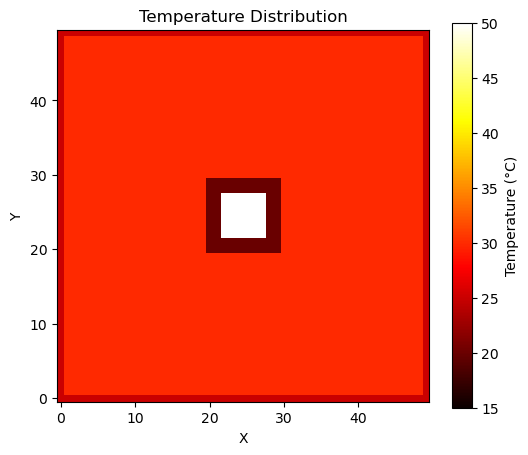

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk

# 默认模型参数
alpha_default = 1e-4  # 热扩散系数
dx_default = dy_default = 1.0  # 空间步长
dt_default = 0.1  # 时间步长
nx_default, ny_default = 50, 50  # 网格数量
nt_default = 100  # 时间步数

class HeatIslandSimulator(tk.Tk):
    def __init__(self):
        super().__init__()

        self.title("城市热岛效应模拟")
        
        # 参数输入框
        self.create_input_fields()

        # 运行按钮
        self.run_button = ttk.Button(self, text="运行模拟", command=self.run_simulation)
        self.run_button.grid(row=7, column=0, columnspan=2, pady=10)

        # 图形展示区
        self.fig, self.ax = plt.subplots(figsize=(6, 5))
        self.canvas = FigureCanvasTkAgg(self.fig, master=self)
        self.canvas.get_tk_widget().grid(row=0, column=2, rowspan=8)

    def create_input_fields(self):
        labels = ['热扩散系数', '空间步长dx', '空间步长dy', '时间步长dt', '网格数nx', '网格数ny', '时间步数']
        defaults = [alpha_default, dx_default, dy_default, dt_default, nx_default, ny_default, nt_default]
        self.entries = []

        for i, (label, default) in enumerate(zip(labels, defaults)):
            ttk.Label(self, text=label).grid(row=i, column=0, padx=10, pady=5, sticky='e')
            entry = ttk.Entry(self)
            entry.insert(0, str(default))
            entry.grid(row=i, column=1, padx=10, pady=5)
            self.entries.append(entry)
        
    def run_simulation(self):
        # 获取输入参数
        alpha = float(self.entries[0].get())
        dx = float(self.entries[1].get())
        dy = float(self.entries[2].get())
        dt = float(self.entries[3].get())
        nx = int(self.entries[4].get())
        ny = int(self.entries[5].get())
        nt = int(self.entries[6].get())

        # 数值稳定性检查
        if dt > dx**2 / (4 * alpha) or dt > dy**2 / (4 * alpha):
            print("时间步长过大，可能导致数值不稳定。")
            return

        # 初始化温度场
        T = np.full((nx, ny), 30.0)  # 初始温度30度
        T_boundary = 25.0  # 边界温度25度
        T_park = 20.0  # 公园区域温度20度
        T[:, 0] = T[:, -1] = T_boundary  # 左右边界
        T[0, :] = T[-1, :] = T_boundary  # 上下边界
        T[20:30, 20:30] = T_park  # 公园区域

        # 热源项 (例如：中心区域高温，代表车辆和建筑物)
        Q = np.zeros((nx, ny))
        Q[22:28, 22:28] = 5  # 中心区域有额外热源

        # 显式时间步进法迭代求解
        for _ in range(nt):
            Tn = T.copy()
            for i in range(1, nx-1):
                for j in range(1, ny-1):
                    T[i, j] = (Tn[i, j] + alpha * dt * (
                                (Tn[i+1, j] - 2 * Tn[i, j] + Tn[i-1, j]) / dx**2 +
                                (Tn[i, j+1] - 2 * Tn[i, j] + Tn[i, j-1]) / dy**2) +
                                Q[i, j] * dt)

        # 显示结果
        self.ax.clear()
        cax = self.ax.imshow(T, cmap='hot', origin='lower', vmin=15, vmax=50)
        self.fig.colorbar(cax, ax=self.ax, label='Temperature (°C)')
        self.ax.set_title('Temperature Distribution')
        self.ax.set_xlabel('X')
        self.ax.set_ylabel('Y')
        self.canvas.draw()

if __name__ == "__main__":
    app = HeatIslandSimulator()
    app.mainloop()


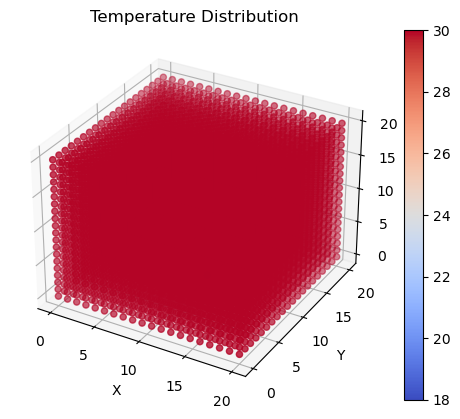

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 模型參數
alpha = 1e-4  # 熱擴散係數
dx = dy = dz = 1.0  # 空間步長
dt = 0.1  # 時間步長
nx, ny, nz = 20, 20, 20  # 網格數量
nt = 100  # 時間步數

# 初始條件
T = np.full((nx, ny, nz), 30.0)  # 初始溫度30度
T_ac = 18.0  # 空調出風口溫度18度

# 設置空調出風口位置 (例如在 (10, 10, 0) 處)
ac_x, ac_y, ac_z = 10, 10, 0
T[ac_x, ac_y, ac_z] = T_ac

# 數值求解
for n in range(nt):
    Tn = T.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            for k in range(1, nz-1):
                T[i, j, k] = Tn[i, j, k] + alpha * dt * (
                    (Tn[i+1, j, k] - 2 * Tn[i, j, k] + Tn[i-1, j, k]) / dx**2 +
                    (Tn[i, j+1, k] - 2 * Tn[i, j, k] + Tn[i, j-1, k]) / dy**2 +
                    (Tn[i, j, k+1] - 2 * Tn[i, j, k] + Tn[i, j, k-1]) / dz**2)

    # 設置空調出風口處的溫度
    T[ac_x, ac_y, ac_z] = T_ac

# 可視化結果
x = np.linspace(0, nx*dx, nx)
y = np.linspace(0, ny*dy, ny)
z = np.linspace(0, nz*dz, nz)
X, Y, Z = np.meshgrid(x, y, z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=T.flatten(), cmap='coolwarm')
fig.colorbar(img)
ax.set_title('Temperature Distribution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


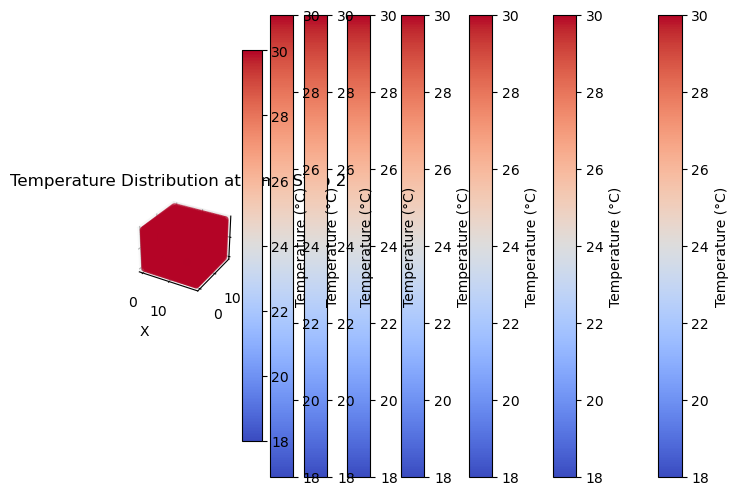

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk

# 模型參數
alpha = 1e-4  # 熱擴散係數
dx = dy = dz = 1.0  # 空間步長
dt = 0.1  # 時間步長
nx, ny, nz = 20, 20, 20  # 網格數量
nt = 100  # 時間步數

# 初始條件
T0 = 30.0
T_ac = 18.0  # 空調出風口溫度18度

# 設置空調出風口位置
ac_x, ac_y, ac_z = 10, 10, 0

# 初始化溫度場
T = np.full((nt, nx, ny, nz), T0)
T[:, ac_x, ac_y, ac_z] = T_ac

# 數值求解
for n in range(1, nt):
    Tn = T[n-1].copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            for k in range(1, nz-1):
                T[n, i, j, k] = Tn[i, j, k] + alpha * dt * (
                    (Tn[i+1, j, k] - 2 * Tn[i, j, k] + Tn[i-1, j, k]) / dx**2 +
                    (Tn[i, j+1, k] - 2 * Tn[i, j, k] + Tn[i, j-1, k]) / dy**2 +
                    (Tn[i, j, k+1] - 2 * Tn[i, j, k] + Tn[i, j, k-1]) / dz**2)

# GUI應用程序
class HeatSimulationApp(tk.Tk):
    def __init__(self):
        super().__init__()

        self.title("空間冷氣傳遞模擬")
        
        # 時間滑動條
        self.time_slider = tk.Scale(self, from_=0, to=nt-1, orient='horizontal', label='Time Step', command=self.update_plot)
        self.time_slider.pack(fill='x', padx=10, pady=10)

        # 圖形展示區
        self.fig = plt.figure(figsize=(8, 6))
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.canvas = FigureCanvasTkAgg(self.fig, master=self)
        self.canvas.get_tk_widget().pack(fill='both', expand=True)

        self.plot_temperature(0)  # 初始化顯示

    def plot_temperature(self, time_step):
        self.ax.clear()
        X, Y, Z = np.meshgrid(np.arange(nx), np.arange(ny), np.arange(nz))
        temp = T[time_step].flatten()
        sc = self.ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=temp, cmap='coolwarm')
        self.fig.colorbar(sc, ax=self.ax, label='Temperature (°C)')
        self.ax.set_title(f'Temperature Distribution at Time Step {time_step}')
        self.ax.set_xlabel('X')
        self.ax.set_ylabel('Y')
        self.ax.set_zlabel('Z')
        self.canvas.draw()

    def update_plot(self, value):
        time_step = int(value)
        self.plot_temperature(time_step)

if __name__ == "__main__":
    app = HeatSimulationApp()
    app.mainloop()

    

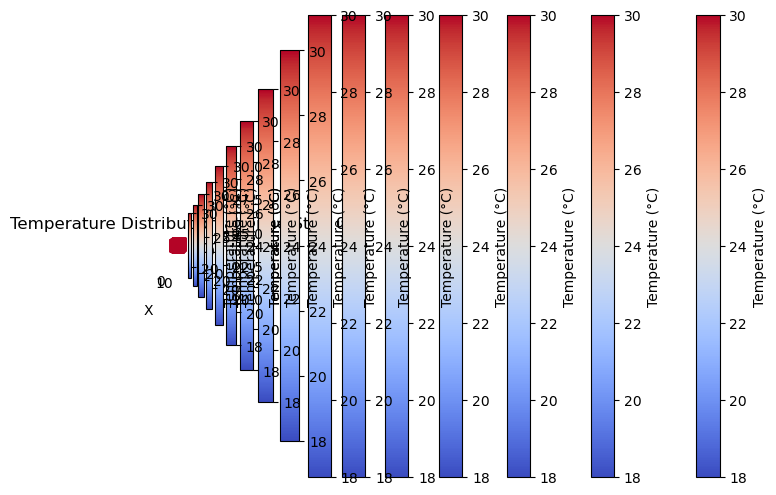

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk

# 模型參數
alpha = 1e-4  # 熱擴散係數
dx = dy = dz = 1.0  # 空間步長
dt = 0.1  # 時間步長
nx, ny, nz = 20, 20, 20  # 網格數量
nt = 100  # 時間步數

# 初始條件
T0 = 30.0
T_ac = 18.0  # 空調出風口溫度18度

# 設置空調出風口位置
ac_x, ac_y, ac_z = 10, 10, 0

# 初始化溫度場
T = np.full((nt, nx, ny, nz), T0)
T[:, ac_x, ac_y, ac_z] = T_ac

# 數值求解
for n in range(1, nt):
    Tn = T[n-1].copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            for k in range(1, nz-1):
                T[n, i, j, k] = Tn[i, j, k] + alpha * dt * (
                    (Tn[i+1, j, k] - 2 * Tn[i, j, k] + Tn[i-1, j, k]) / dx**2 +
                    (Tn[i, j+1, k] - 2 * Tn[i, j, k] + Tn[i, j-1, k]) / dy**2 +
                    (Tn[i, j, k+1] - 2 * Tn[i, j, k] + Tn[i, j, k-1]) / dz**2)

# GUI應用程序
class HeatSimulationApp(tk.Tk):
    def __init__(self):
        super().__init__()

        self.title("空間冷氣傳遞模擬")
        
        # 時間滑動條
        self.time_slider = tk.Scale(self, from_=0, to=nt-1, orient='horizontal', label='Time Step', command=self.update_plot)
        self.time_slider.pack(fill='x', padx=10, pady=10)

        # 圖形展示區
        self.fig = plt.figure(figsize=(8, 6))
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.canvas = FigureCanvasTkAgg(self.fig, master=self)
        self.canvas.get_tk_widget().pack(fill='both', expand=True)

        self.plot_temperature(0)  # 初始化顯示

    def plot_temperature(self, time_step):
        self.ax.clear()
        X, Y, Z = np.meshgrid(np.arange(nx), np.arange(ny), np.arange(nz))
        temp = T[time_step].flatten()
        sc = self.ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=temp, cmap='coolwarm', vmin=T_ac, vmax=T0)
        self.fig.colorbar(sc, ax=self.ax, label='Temperature (°C)')
        self.ax.set_title(f'Temperature Distribution at Time Step {time_step}')
        self.ax.set_xlabel('X')
        self.ax.set_ylabel('Y')
        self.ax.set_zlabel('Z')
        self.canvas.draw()

    def update_plot(self, value):
        time_step = int(value)
        self.plot_temperature(time_step)

if __name__ == "__main__":
    app = HeatSimulationApp()
    app.mainloop()


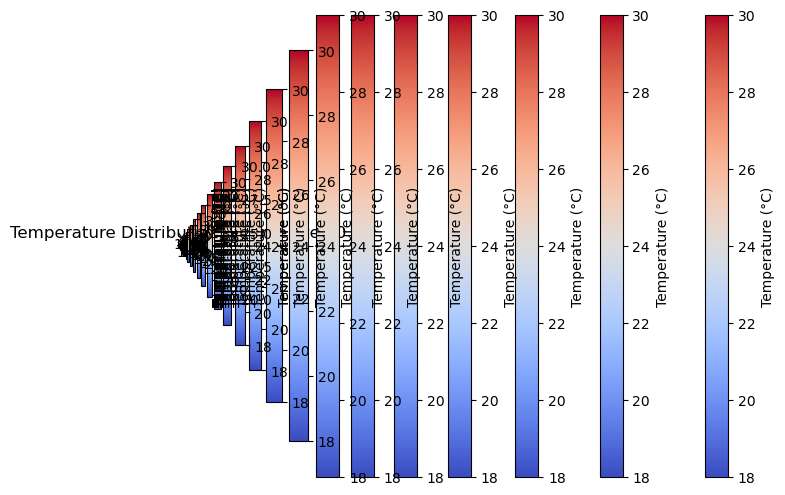

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk

# 模型參數
alpha = 1e-4  # 熱擴散係數
dx = dy = dz = 1.0  # 空間步長
dt = 0.1  # 時間步長
nx, ny, nz = 20, 20, 20  # 網格數量
nt = 100  # 時間步數

# 初始條件
T0 = 30.0
T_ac = 18.0  # 空調出風口溫度18度

# 設置空調出風口位置
ac_x, ac_y, ac_z = 10, 10, 0

# 初始化溫度場
T = np.full((nt, nx, ny, nz), T0)
T[:, ac_x, ac_y, ac_z] = T_ac

# 數值求解
for n in range(1, nt):
    Tn = T[n-1].copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            for k in range(1, nz-1):
                T[n, i, j, k] = Tn[i, j, k] + alpha * dt * (
                    (Tn[i+1, j, k] - 2 * Tn[i, j, k] + Tn[i-1, j, k]) / dx**2 +
                    (Tn[i, j+1, k] - 2 * Tn[i, j, k] + Tn[i, j-1, k]) / dy**2 +
                    (Tn[i, j, k+1] - 2 * Tn[i, j, k] + Tn[i, j, k-1]) / dz**2)

# GUI應用程序
class HeatSimulationApp(tk.Tk):
    def __init__(self):
        super().__init__()

        self.title("空間冷氣傳遞模擬")
        
        # 時間滑動條
        self.time_slider = tk.Scale(self, from_=0, to=nt-1, orient='horizontal', label='Time Step', command=self.update_plot)
        self.time_slider.pack(fill='x', padx=10, pady=10)

        # 圖形展示區
        self.fig = plt.figure(figsize=(8, 6))
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.canvas = FigureCanvasTkAgg(self.fig, master=self)
        self.canvas.get_tk_widget().pack(fill='both', expand=True)

        self.plot_temperature(0)  # 初始化顯示

    def plot_temperature(self, time_step):
        self.ax.clear()
        X, Y, Z = np.meshgrid(np.arange(nx), np.arange(ny), np.arange(nz))
        temp = T[time_step].flatten()
        sc = self.ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=temp, cmap='coolwarm', vmin=T_ac, vmax=T0)
        self.fig.colorbar(sc, ax=self.ax, label='Temperature (°C)')
        self.ax.set_title(f'Temperature Distribution at Time Step {time_step}')
        self.ax.set_xlabel('X')
        self.ax.set_ylabel('Y')
        self.ax.set_zlabel('Z')
        self.canvas.draw()

    def update_plot(self, value):
        time_step = int(value)
        self.plot_temperature(time_step)

if __name__ == "__main__":
    app = HeatSimulationApp()
    app.mainloop()


In [14]:
pip install numpy matplotlib PyQt5


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure
from PyQt5.QtWidgets import QApplication, QMainWindow, QVBoxLayout, QWidget, QSlider, QLabel, QSizePolicy
from PyQt5.QtCore import Qt, QTimer

class HeatTransferSimulation:
    def __init__(self, room_size=(20, 20), delta_t=0.1, delta_x=1, simulation_time=100):
        self.room_size = room_size
        self.delta_t = delta_t
        self.delta_x = delta_x
        self.simulation_time = simulation_time
        self.num_steps = int(simulation_time / delta_t)

        self.temperature = np.zeros(room_size)  # Initial temperature distribution
        self.temperature[int(room_size[0]/2)-2:int(room_size[0]/2)+2, int(room_size[1]/2)-2:int(room_size[1]/2)+2] = 50.0  # Initial condition: set a hot spot in the middle

        self.outlet_temperature = 50.0
        self.outlet_position = (0, int(room_size[1]/2))  # Position of the air conditioner outlet

        self.alpha = 0.1  # Thermal diffusivity (adjust as needed)
        self.calculate_coefficients()

    def calculate_coefficients(self):
        self.coefficient_x = self.alpha * self.delta_t / self.delta_x**2
        self.coefficient_y = self.alpha * self.delta_t / self.delta_x**2

    def step_simulation(self):
        new_temperature = np.copy(self.temperature)

        for i in range(1, self.room_size[0] - 1):
            for j in range(1, self.room_size[1] - 1):
                if (i, j) == self.outlet_position:
                    new_temperature[i, j] = self.outlet_temperature
                else:
                    new_temperature[i, j] = (1 - 4 * self.coefficient_x) * self.temperature[i, j] \
                                            + self.coefficient_x * (self.temperature[i+1, j] + self.temperature[i-1, j]) \
                                            + self.coefficient_y * (self.temperature[i, j+1] + self.temperature[i, j-1])

        self.temperature = new_temperature

    def get_temperature(self):
        return self.temperature


class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()

        self.setWindowTitle("Heat Transfer Simulation")
        self.setGeometry(100, 100, 800, 600)

        self.central_widget = QWidget(self)
        self.setCentralWidget(self.central_widget)

        self.layout = QVBoxLayout(self.central_widget)

        self.canvas = PlotCanvas(self, width=6, height=4)
        self.layout.addWidget(self.canvas)

        self.time_slider = QSlider(Qt.Horizontal)
        self.time_slider.setMinimum(0)
        self.time_slider.setMaximum(1000)
        self.time_slider.setValue(0)
        self.time_slider.setTickPosition(QSlider.TicksBelow)
        self.time_slider.setTickInterval(100)
        self.layout.addWidget(self.time_slider)

        self.time_label = QLabel("Time: 0.0")
        self.layout.addWidget(self.time_label)

        self.simulation = HeatTransferSimulation()

        self.timer = QTimer(self)
        self.timer.timeout.connect(self.update_simulation)
        self.timer.start(50)  # Update every 50 ms

        self.time_slider.valueChanged.connect(self.update_time_label)

    def update_simulation(self):
        steps_per_frame = 10
        for _ in range(steps_per_frame):
            self.simulation.step_simulation()
        self.canvas.update_figure(self.simulation.get_temperature())

    def update_time_label(self):
        time_value = self.time_slider.value() / 100.0
        self.time_label.setText(f"Time: {time_value:.1f}")

        # Adjust simulation time based on slider position
        self.simulation.simulation_time = time_value

    def closeEvent(self, event):
        self.timer.stop()
        event.accept()


class PlotCanvas(FigureCanvas):
    def __init__(self, parent=None, width=5, height=4, dpi=100):
        fig = Figure(figsize=(width, height), dpi=dpi)
        self.axes = fig.add_subplot(111)

        FigureCanvas.__init__(self, fig)
        self.setParent(parent)

        FigureCanvas.setSizePolicy(self, QSizePolicy.Expanding, QSizePolicy.Expanding)
        FigureCanvas.updateGeometry(self)

    def update_figure(self, temperature):
        self.axes.clear()
        self.axes.imshow(temperature, cmap='coolwarm', interpolation='nearest')
        self.draw()


if __name__ == '__main__':
    import sys

    app = QApplication(sys.argv)
    mainWindow = MainWindow()
    mainWindow.show()
    sys.exit(app.exec_())


SystemExit: 0

D:\python\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure
from PyQt5.QtWidgets import QApplication, QMainWindow, QVBoxLayout, QWidget, QSlider, QLabel, QSizePolicy
from PyQt5.QtCore import Qt, QTimer
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D from mpl_toolkits.mplot3d

class PlotCanvas(FigureCanvas):
    def __init__(self, parent=None, width=5, height=4, dpi=100):
        fig = Figure(figsize=(width, height), dpi=dpi)
        self.axes = fig.add_subplot(111, projection='3d')  # Add projection='3d' for 3D plot

        FigureCanvas.__init__(self, fig)
        self.setParent(parent)

        FigureCanvas.setSizePolicy(self, QSizePolicy.Expanding, QSizePolicy.Expanding)
        FigureCanvas.updateGeometry(self)

    def update_figure(self, temperature):
        self.axes.clear()

        # Generate grid for 3D plot
        x, y = np.meshgrid(np.arange(temperature.shape[1]), np.arange(temperature.shape[0]))

        # Plot 3D surface
        self.axes.plot_surface(x, y, temperature, cmap='coolwarm', rstride=1, cstride=1, alpha=0.8)

        self.draw()
        
class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()

        self.setWindowTitle("Heat Transfer Simulation")
        self.setGeometry(100, 100, 800, 600)

        self.central_widget = QWidget(self)
        self.setCentralWidget(self.central_widget)

        self.layout = QVBoxLayout(self.central_widget)

        self.canvas = PlotCanvas(self, width=8, height=6)  # Adjust size as needed
        self.layout.addWidget(self.canvas)

        self.time_slider = QSlider(Qt.Horizontal)
        self.time_slider.setMinimum(0)
        self.time_slider.setMaximum(1000)
        self.time_slider.setValue(0)
        self.time_slider.setTickPosition(QSlider.TicksBelow)
        self.time_slider.setTickInterval(100)
        self.layout.addWidget(self.time_slider)

        self.time_label = QLabel("Time: 0.0")
        self.layout.addWidget(self.time_label)

        self.simulation = HeatTransferSimulation()

        self.timer = QTimer(self)
        self.timer.timeout.connect(self.update_simulation)
        self.timer.start(50)  # Update every 50 ms

        self.time_slider.valueChanged.connect(self.update_time_label)

    def update_simulation(self):
        steps_per_frame = 10
        for _ in range(steps_per_frame):
            self.simulation.step_simulation()
        self.canvas.update_figure(self.simulation.get_temperature())

    def update_time_label(self):
        time_value = self.time_slider.value() / 100.0
        self.time_label.setText(f"Time: {time_value:.1f}")

        # Adjust simulation time based on slider position
        self.simulation.simulation_time = time_value

    def closeEvent(self, event):
        self.timer.stop()
        event.accept()


if __name__ == '__main__':
    import sys

    app = QApplication(sys.argv)
    mainWindow = MainWindow()
    mainWindow.show()
    sys.exit(app.exec_())


NameError: name 'HeatTransferSimulation' is not defined

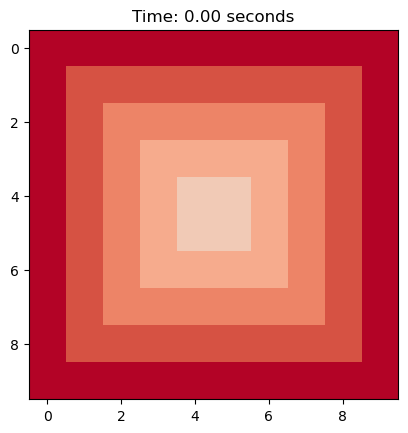

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk

# 設定參數
room_size = 10
dx = dy = dz = 1
dt = 0.01
alpha = 0.01
initial_temp = 25
ac_temp = 15
ac_position = (5, 5, 0)
total_time_steps = 100

# 建立溫度場
temp = np.full((room_size, room_size, room_size), initial_temp)

# 熱傳導方程的有限差分
def update_temperature(temp):
    new_temp = temp.copy()
    for i in range(1, room_size - 1):
        for j in range(1, room_size - 1):
            for k in range(1, room_size - 1):
                new_temp[i, j, k] = temp[i, j, k] + alpha * dt * (
                    (temp[i+1, j, k] - 2*temp[i, j, k] + temp[i-1, j, k]) / dx**2 +
                    (temp[i, j+1, k] - 2*temp[i, j, k] + temp[i, j-1, k]) / dy**2 +
                    (temp[i, j, k+1] - 2*temp[i, j, k] + temp[i, j, k-1]) / dz**2
                )
    # 設定空調出風口的溫度
    new_temp[ac_position] = ac_temp
    return new_temp

# 更新圖片
def update_plot(frame):
    global temp
    for _ in range(frame):
        temp = update_temperature(temp)
    ax.clear()
    ax.imshow(temp[:, :, room_size // 2], cmap='coolwarm', vmin=ac_temp, vmax=initial_temp)
    ax.set_title(f'Time: {frame * dt:.2f} seconds')
    canvas.draw()

# 設計GUI
root = tk.Tk()
root.title("空間冷氣傳遞模擬")

fig, ax = plt.subplots()
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack()

time_slider = ttk.Scale(root, from_=0, to=total_time_steps, orient='horizontal', command=lambda val: update_plot(int(float(val))))
time_slider.pack()

# 初始化圖片
update_plot(0)

root.mainloop()


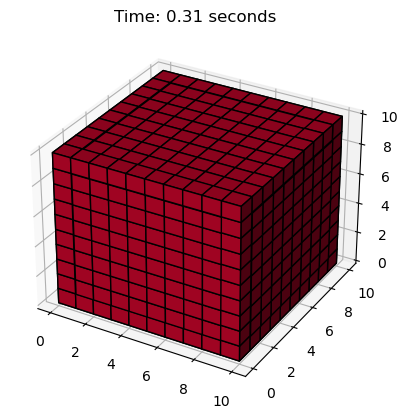

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
from mpl_toolkits.mplot3d import Axes3D

# 設定參數
room_size = 10
dx = dy = dz = 1
dt = 0.01
alpha = 0.01
initial_temp = 25
ac_temp = 15
ac_position = (5, 5, 0)
total_time_steps = 100

# 建立溫度場
temp = np.full((room_size, room_size, room_size), initial_temp)

# 熱傳導方程的有限差分
def update_temperature(temp):
    new_temp = temp.copy()
    for i in range(1, room_size - 1):
        for j in range(1, room_size - 1):
            for k in range(1, room_size - 1):
                new_temp[i, j, k] = temp[i, j, k] + alpha * dt * (
                    (temp[i+1, j, k] - 2*temp[i, j, k] + temp[i-1, j, k]) / dx**2 +
                    (temp[i, j+1, k] - 2*temp[i, j, k] + temp[i, j-1, k]) / dy**2 +
                    (temp[i, j, k+1] - 2*temp[i, j, k] + temp[i, j, k-1]) / dz**2
                )
    # 設定空調出風口的溫度
    new_temp[ac_position] = ac_temp
    return new_temp

# 更新圖片
def update_plot(frame):
    global temp
    for _ in range(frame):
        temp = update_temperature(temp)
    ax.clear()
    ax.voxels((temp - ac_temp) / (initial_temp - ac_temp), facecolors=plt.cm.coolwarm((temp - ac_temp) / (initial_temp - ac_temp)), edgecolor='k')
    ax.set_title(f'Time: {frame * dt:.2f} seconds')
    canvas.draw()

# 設計GUI
root = tk.Tk()
root.title("空間冷氣傳遞模擬")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack()

time_slider = ttk.Scale(root, from_=0, to=total_time_steps, orient='horizontal', command=lambda val: update_plot(int(float(val))))
time_slider.pack()

# 初始化圖片
update_plot(0)

root.mainloop()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
from mpl_toolkits.mplot3d import Axes3D

# 設定參數
room_size = 10
dx = dy = dz = 1
dt = 0.01
alpha = 0.01
initial_temp = 30
ac_temp = 10
ac_position = (5, 5, 0)
total_time_steps = 50000  # 增加總時間步數

# 建立溫度場
temp = np.full((room_size, room_size, room_size), initial_temp)

# 熱傳導方程的有限差分
def update_temperature(temp):
    new_temp = temp.copy()
    for i in range(1, room_size - 1):
        for j in range(1, room_size - 1):
            for k in range(1, room_size - 1):
                new_temp[i, j, k] = temp[i, j, k] + alpha * dt * (
                    (temp[i+1, j, k] - 2*temp[i, j, k] + temp[i-1, j, k]) / dx**2 +
                    (temp[i, j+1, k] - 2*temp[i, j, k] + temp[i, j-1, k]) / dy**2 +
                    (temp[i, j, k+1] - 2*temp[i, j, k] + temp[i, j, k-1]) / dz**2
                )
    # 設定空調出風口的溫度
    new_temp[ac_position] = ac_temp
    return new_temp

# 更新圖片
def update_plot(frame):
    global temp
    # 每次更新到當前滑條指示的時間步數
    temp = np.full((room_size, room_size, room_size), initial_temp)
    for _ in range(frame):
        temp = update_temperature(temp)
    ax.clear()
    ax.voxels((temp - ac_temp) / (initial_temp - ac_temp), facecolors=plt.cm.coolwarm((temp - ac_temp) / (initial_temp - ac_temp)), edgecolor='k')
    ax.set_title(f'Time: {frame * dt:.2f} seconds')
    canvas.draw()

# 設計GUI
root = tk.Tk()
root.title("空間冷氣傳遞模擬")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack()

time_slider = ttk.Scale(root, from_=0, to=total_time_steps, orient='horizontal', command=lambda val: update_plot(int(float(val))))
time_slider.pack()

# 初始化圖片
update_plot(0)

root.mainloop()


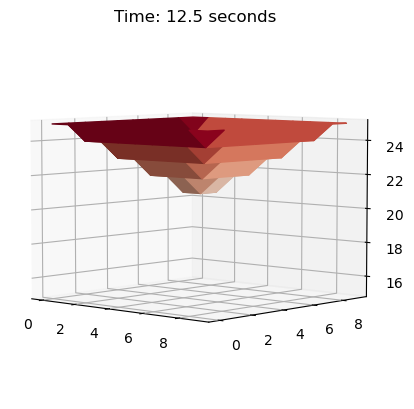

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
from mpl_toolkits.mplot3d import Axes3D

# 設定參數
room_size = 10
dx = dy = dz = 1
dt = 0.5  # 將時間步長設為0.5秒
alpha = 0.01
initial_temp = 25
ac_temp = 15
ac_position = (5, 5, 0)
total_time_steps = 25  # 總時間步數

# 建立溫度場
temp = np.full((room_size, room_size, room_size), initial_temp)

# 熱傳導方程的有限差分
def update_temperature(temp):
    new_temp = temp.copy()
    for i in range(1, room_size - 1):
        for j in range(1, room_size - 1):
            for k in range(1, room_size - 1):
                new_temp[i, j, k] = temp[i, j, k] + alpha * dt * (
                    (temp[i+1, j, k] - 2*temp[i, j, k] + temp[i-1, j, k]) / dx**2 +
                    (temp[i, j+1, k] - 2*temp[i, j, k] + temp[i, j-1, k]) / dy**2 +
                    (temp[i, j, k+1] - 2*temp[i, j, k] + temp[i, j, k-1]) / dz**2
                )
    # 設定空調出風口的溫度
    new_temp[ac_position] = ac_temp
    return new_temp

# 更新圖片
def update_plot(frame):
    global temp
    # 每次更新到當前滑條指示的時間步數
    temp = np.full((room_size, room_size, room_size), initial_temp)
    for _ in range(frame):
        temp = update_temperature(temp)
    ax.clear()
    # 繪製3D切片圖
    mid_z = room_size // 2
    x, y = np.meshgrid(np.arange(room_size), np.arange(room_size))
    z = temp[:, :, mid_z]
    ax.plot_surface(x, y, z, facecolors=plt.cm.coolwarm((z - ac_temp) / (initial_temp - ac_temp)), rstride=1, cstride=1)
    ax.set_zlim(ac_temp, initial_temp)
    ax.set_title(f'Time: {frame * dt} seconds')
    canvas.draw()

# 設計GUI
root = tk.Tk()
root.title("空間冷氣傳遞模擬")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack()

time_slider = ttk.Scale(root, from_=0, to=total_time_steps, orient='horizontal', command=lambda val: update_plot(int(float(val))))
time_slider.pack()

# 初始化圖片
update_plot(0)

root.mainloop()


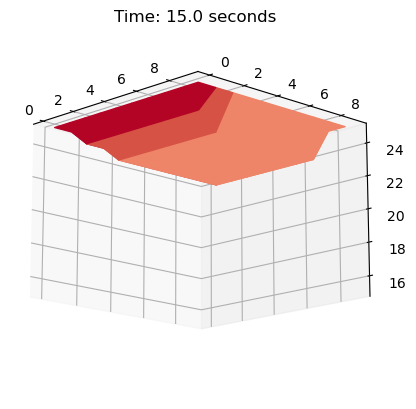

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
from mpl_toolkits.mplot3d import Axes3D

# 設定參數
room_size = 10
dx = dy = dz = 1
dt = 0.5  # 將時間步長設為1秒
alpha = 0.1  # 增大熱擴散係數
initial_temp = 25
ac_temp = 15
ac_position = (8, 8, 8)
total_time_steps = 40  # 總時間步數

# 建立溫度場
temp = np.full((room_size, room_size, room_size), initial_temp)

# 熱傳導方程的有限差分
def update_temperature(temp):
    new_temp = temp.copy()
    for i in range(1, room_size - 1):
        for j in range(1, room_size - 1):
            for k in range(1, room_size - 1):
                new_temp[i, j, k] = temp[i, j, k] + alpha * dt * (
                    (temp[i+1, j, k] - 2*temp[i, j, k] + temp[i-1, j, k]) / dx**2 +
                    (temp[i, j+1, k] - 2*temp[i, j, k] + temp[i, j-1, k]) / dy**2 +
                    (temp[i, j, k+1] - 2*temp[i, j, k] + temp[i, j, k-1]) / dz**2
                )
    # 設定空調出風口的溫度
    new_temp[ac_position] = ac_temp
    return new_temp

# 更新圖片
def update_plot(frame):
    global temp
    # 每次更新到當前滑條指示的時間步數
    temp = np.full((room_size, room_size, room_size), initial_temp)
    for _ in range(frame):
        temp = update_temperature(temp)
    ax.clear()
    # 繪製3D切片圖
    mid_z = room_size // 2
    x, y = np.meshgrid(np.arange(room_size), np.arange(room_size))
    z = temp[:, :, mid_z]
    ax.plot_surface(x, y, z, facecolors=plt.cm.coolwarm((z - ac_temp) / (initial_temp - ac_temp)), rstride=1, cstride=1, shade=False)
    ax.set_zlim(ac_temp, initial_temp)
    ax.set_title(f'Time: {frame * dt} seconds')
    canvas.draw()

# 設計GUI
root = tk.Tk()
root.title("空間冷氣傳遞模擬")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack()

time_slider = ttk.Scale(root, from_=0, to=total_time_steps, orient='horizontal', command=lambda val: update_plot(int(float(val))))
time_slider.pack()

# 初始化圖片
update_plot(0)

root.mainloop()


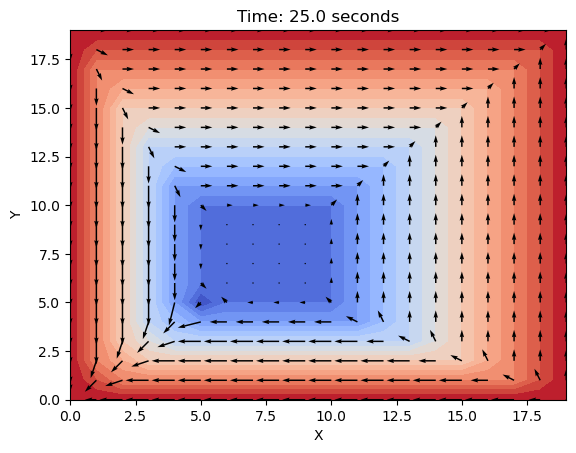

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
from mpl_toolkits.mplot3d import Axes3D

# 設定參數
room_size = 20
dx = dy = dz = 1
dt = 0.5  # 將時間步長設為1秒
alpha = 0.01  # 調整熱擴散係數
initial_temp = 25
ac_temp = 15
ac_position = (5, 5, 10)
total_time_steps = 50# 總時間步數

# 建立溫度場
temp = np.full((room_size, room_size, room_size), initial_temp)

# 熱傳導方程的有限差分
def update_temperature(temp):
    new_temp = temp.copy()
    for i in range(1, room_size - 1):
        for j in range(1, room_size - 1):
            for k in range(1, room_size - 1):
                new_temp[i, j, k] = temp[i, j, k] + alpha * dt * (
                    (temp[i+1, j, k] - 2*temp[i, j, k] + temp[i-1, j, k]) / dx**2 +
                    (temp[i, j+1, k] - 2*temp[i, j, k] + temp[i, j-1, k]) / dy**2 +
                    (temp[i, j, k+1] - 2*temp[i, j, k] + temp[i, j, k-1]) / dz**2
                )
    # 設定空調出風口的溫度
    new_temp[ac_position] = ac_temp
    return new_temp

# 更新圖片
def update_plot(frame):
    global temp
    # 每次更新到當前滑條指示的時間步數
    temp = np.full((room_size, room_size, room_size), initial_temp)
    for _ in range(frame):
        temp = update_temperature(temp)

    ax.clear()
    
    # 繪製等高線圖和流線圖
    mid_z = room_size // 2
    x, y = np.meshgrid(np.arange(room_size), np.arange(room_size))
    z = temp[:, :, mid_z]

    ax.contourf(x, y, z, cmap='coolwarm', levels=20)
    ax.quiver(x, y, np.gradient(z, axis=0), np.gradient(z, axis=1), color='k')
    
    ax.set_title(f'Time: {frame * dt} seconds')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    canvas.draw()

# 設計GUI
root = tk.Tk()
root.title("空間冷氣傳遞模擬")

fig, ax = plt.subplots()
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack()

time_slider = ttk.Scale(root, from_=0, to=total_time_steps, orient='horizontal', command=lambda val: update_plot(int(float(val))))
time_slider.pack()

# 初始化圖片
update_plot(0)

root.mainloop()


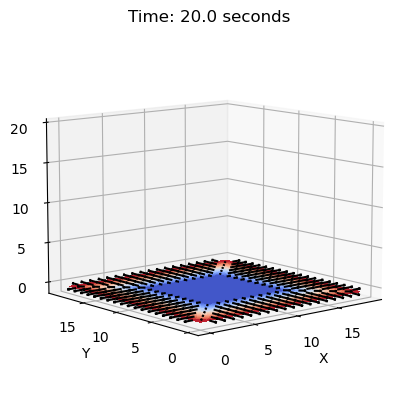

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
from mpl_toolkits.mplot3d import Axes3D

# 設定參數
room_size = 20
dx = dy = dz = 1
dt = 0.5  # 將時間步長設為1秒
alpha = 0.01  # 調整熱擴散係數
initial_temp = 25
ac_temp = 15
ac_position = (5, 5, 0)
total_time_steps = 40  # 總時間步數

# 建立溫度場
temp = np.full((room_size, room_size, room_size), initial_temp)

# 熱傳導方程的有限差分
def update_temperature(temp):
    new_temp = temp.copy()
    for i in range(1, room_size - 1):
        for j in range(1, room_size - 1):
            for k in range(1, room_size - 1):
                new_temp[i, j, k] = temp[i, j, k] + alpha * dt * (
                    (temp[i+1, j, k] - 2*temp[i, j, k] + temp[i-1, j, k]) / dx**2 +
                    (temp[i, j+1, k] - 2*temp[i, j, k] + temp[i, j-1, k]) / dy**2 +
                    (temp[i, j, k+1] - 2*temp[i, j, k] + temp[i, j, k-1]) / dz**2
                )
    # 設定空調出風口的溫度
    new_temp[ac_position] = ac_temp
    return new_temp

# 更新圖片
def update_plot(frame):
    global temp
    # 每次更新到當前滑條指示的時間步數
    temp = np.full((room_size, room_size, room_size), initial_temp)
    for _ in range(frame):
        temp = update_temperature(temp)

    ax.clear()

    # 繪製等高線圖和流線圖
    mid_z = room_size // 2
    x, y = np.meshgrid(np.arange(room_size), np.arange(room_size))
    z = temp[:, :, mid_z]

    ax.contourf(x, y, z, zdir='z', offset=-0.5, cmap='coolwarm', levels=20)
    ax.quiver(x, y, -0.5, np.gradient(z, axis=1), np.gradient(z, axis=0), 0, color='k')

    # 標記空調位置
    ax.scatter(ac_position[0], ac_position[1], -0.5, color='blue')  # 用藍色圓點標記空調位置
    ax.text(ac_position[0], ac_position[1], -0.5, ' AC', color='blue')

    ax.set_title(f'Time: {frame * dt} seconds')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_zlim(-1, room_size)
    canvas.draw()

# 設計GUI
def set_view_angle(event):
    angle = int(view_angle_slider.get())
    ax.view_init(elev=10, azim=angle)
    update_plot(int(time_slider.get()))

root = tk.Tk()
root.title("空間冷氣傳遞模擬")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack()

time_slider = ttk.Scale(root, from_=0, to=total_time_steps, orient='horizontal', command=lambda val: update_plot(int(float(val))))
time_slider.pack()

# 增加視角調整的滑條
view_angle_slider = ttk.Scale(root, from_=0, to=360, orient='horizontal', command=set_view_angle)
view_angle_slider.set(45)  # 初始視角設為45度
view_angle_slider.pack()

# 初始化圖片
update_plot(0)

root.mainloop()


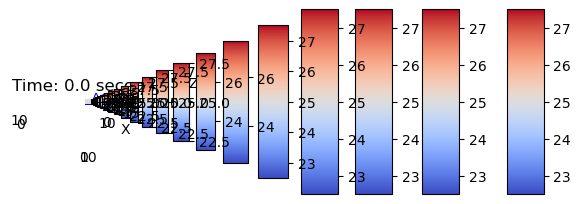

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
from mpl_toolkits.mplot3d import Axes3D

# 設定參數
room_size = 20
dx = dy = dz = 1
dt = 0.5  # 將時間步長設為1秒
alpha = 0.01  # 調整熱擴散係數
initial_temp = 25
ac_temp = 15
ac_position = (5, 5, 0)
total_time_steps = 30  # 總時間步數

# 建立溫度場
temp = np.full((room_size, room_size, room_size), initial_temp)

# 熱傳導方程的有限差分
def update_temperature(temp):
    new_temp = temp.copy()
    for i in range(1, room_size - 1):
        for j in range(1, room_size - 1):
            for k in range(1, room_size - 1):
                new_temp[i, j, k] = temp[i, j, k] + alpha * dt * (
                    (temp[i+1, j, k] - 2*temp[i, j, k] + temp[i-1, j, k]) / dx**2 +
                    (temp[i, j+1, k] - 2*temp[i, j, k] + temp[i, j-1, k]) / dy**2 +
                    (temp[i, j, k+1] - 2*temp[i, j, k] + temp[i, j, k-1]) / dz**2
                )
    # 設定空調出風口的溫度
    new_temp[ac_position] = ac_temp
    return new_temp

# 更新圖片
def update_plot(frame):
    global temp
    # 每次更新到當前滑條指示的時間步數
    temp = np.full((room_size, room_size, room_size), initial_temp)
    for _ in range(frame):
        temp = update_temperature(temp)

    ax.clear()

    # 繪製3D溫度場
    x, y, z = np.meshgrid(np.arange(room_size), np.arange(room_size), np.arange(room_size))
    scatter = ax.scatter(x, y, z, c=temp.flatten(), cmap='coolwarm')

    # 標記空調位置
    ax.scatter(*ac_position, color='blue', s=100)  # 用藍色圓點標記空調位置
    ax.text(*ac_position, ' AC', color='blue')

    ax.set_title(f'Time: {frame * dt} seconds')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
    canvas.draw()

# 設計GUI
def set_view_angle(event):
    angle = int(view_angle_slider.get())
    ax.view_init(elev=10, azim=angle)
    update_plot(int(time_slider.get()))

root = tk.Tk()
root.title("空間冷氣傳遞模擬")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack()

time_slider = ttk.Scale(root, from_=0, to=total_time_steps, orient='horizontal', command=lambda val: update_plot(int(float(val))))
time_slider.pack()

# 增加視角調整的滑條
view_angle_slider = ttk.Scale(root, from_=0, to=360, orient='horizontal', command=set_view_angle)
view_angle_slider.set(45)  # 初始視角設為45度
view_angle_slider.pack()

# 初始化圖片
update_plot(0)

root.mainloop()


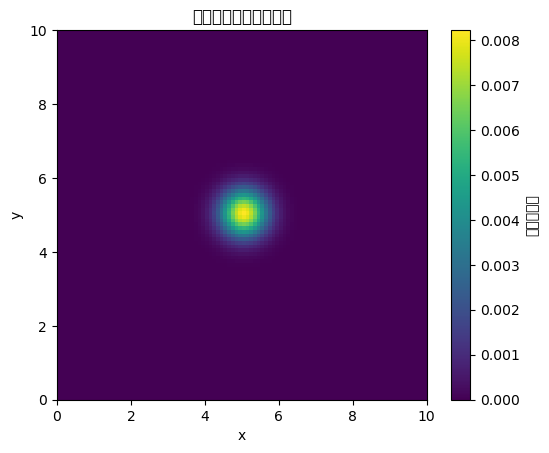

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 參數設置
D = 0.1  # 擴散係數
L = 10.0  # 湖泊邊長
T = 1.0  # 模擬時間
N = 100  # 網格點數
dt = 0.001  # 時間步長

# 網格離散化
dx = L / (N - 1)
dy = L / (N - 1)
nt = int(T / dt)

# 初始濃度場
C = np.zeros((N, N))
C0 = 1.0  # 釋放點濃度
C[N//2, N//2] = C0

# 時間步進求解
for n in range(nt):
    C_new = C.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            C_new[i, j] = C[i, j] + D * dt * (
                (C[i+1, j] - 2*C[i, j] + C[i-1, j]) / dx**2 +
                (C[i, j+1] - 2*C[i, j] + C[i, j-1]) / dy**2
            )
    C = C_new

# 結果繪圖
plt.imshow(C, extent=[0, L, 0, L], origin='lower', cmap='viridis')
plt.colorbar(label='污染物濃度')
plt.title('湖泊中污染物濃度分佈')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


C:\Users\angus\AppData\Local\Temp\ipykernel_42484\2273930642.py:59: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  self.canvas.draw()
C:\Users\angus\AppData\Local\Temp\ipykernel_42484\2273930642.py:59: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  self.canvas.draw()


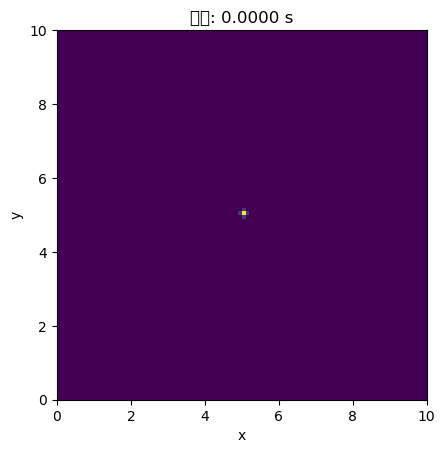

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

# 參數設置
D = 0.1  # 擴散係數
L = 10.0  # 湖泊邊長
T = 1.0  # 模擬總時間
N = 100  # 網格點數
dt = 0.01  # 時間步長

# 網格離散化
dx = L / (N - 1)
dy = L / (N - 1)
nt = int(T / dt)

# 初始濃度場
C = np.zeros((N, N))
C0 = 1.0  # 釋放點濃度
C[N//2, N//2] = C0

# 時間步進求解並保存每個時間步的濃度場
concentration_data = []

for n in range(nt):
    C_new = C.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            C_new[i, j] = C[i, j] + D * dt * (
                (C[i+1, j] - 2*C[i, j] + C[i-1, j]) / dx**2 +
                (C[i, j+1] - 2*C[i, j] + C[i, j-1]) / dy**2
            )
    C = C_new
    concentration_data.append(C.copy())

# 創建GUI
class DiffusionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("污染物擴散模擬")

        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        self.slider = tk.Scale(self.root, from_=0, to=nt-1, orient=tk.HORIZONTAL, command=self.update_plot, length=500)
        self.slider.pack(side=tk.BOTTOM)

        self.update_plot(0)

    def update_plot(self, val):
        val = int(val)
        self.ax.clear()
        self.ax.imshow(concentration_data[val], extent=[0, L, 0, L], origin='lower', cmap='viridis')
        self.ax.set_title(f'時間: {val * dt:.4f} s')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.canvas.draw()

root = tk.Tk()
app = DiffusionApp(root)
root.mainloop()


C:\Users\angus\AppData\Local\Temp\ipykernel_42484\1588782273.py:59: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  self.canvas.draw()
C:\Users\angus\AppData\Local\Temp\ipykernel_42484\1588782273.py:59: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  self.canvas.draw()


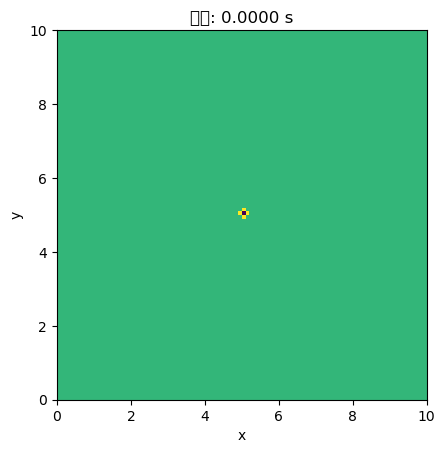

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

# 參數設置
D = 0.1  # 擴散係數
L = 10.0  # 湖泊邊長
T = 10.0  # 模擬總時間
N = 100  # 網格點數
dt = 0.05  # 時間步長

# 網格離散化
dx = L / (N - 1)
dy = L / (N - 1)
nt = int(T / dt)

# 初始濃度場
C = np.zeros((N, N))
C0 = 1.0  # 釋放點濃度
C[N//2, N//2] = C0

# 時間步進求解並保存每個時間步的濃度場
concentration_data = []

for n in range(nt):
    C_new = C.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            C_new[i, j] = C[i, j] + D * dt * (
                (C[i+1, j] - 2*C[i, j] + C[i-1, j]) / dx**2 +
                (C[i, j+1] - 2*C[i, j] + C[i, j-1]) / dy**2
            )
    C = C_new
    concentration_data.append(C.copy())

# 創建GUI
class DiffusionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("污染物擴散模擬")

        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        self.slider = tk.Scale(self.root, from_=0, to=nt-1, orient=tk.HORIZONTAL, command=self.update_plot, length=800)
        self.slider.pack(side=tk.BOTTOM)

        self.update_plot(0)

    def update_plot(self, val):
        val = int(val)
        self.ax.clear()
        self.ax.imshow(concentration_data[val], extent=[0, L, 0, L], origin='lower', cmap='viridis')
        self.ax.set_title(f'時間: {val * dt:.4f} s')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.canvas.draw()

root = tk.Tk()
app = DiffusionApp(root)
root.mainloop()


C:\Users\angus\AppData\Local\Temp\ipykernel_12516\2902585918.py:94: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  self.canvas.draw()
C:\Users\angus\AppData\Local\Temp\ipykernel_12516\2902585918.py:94: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  self.canvas.draw()


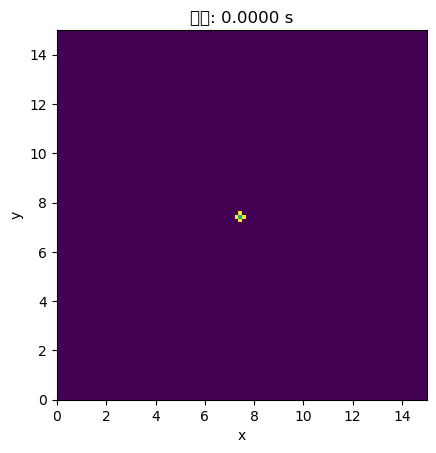

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

class DiffusionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("污染物擴散模擬")

        # 初始參數設置
        self.D = 0.1  # 擴散係數
        self.L = 15.0  # 湖泊邊長
        self.T = 10.0  # 模擬總時間
        self.N = 100  # 網格點數
        self.dt = 0.05  # 時間步長
        self.x_pos = self.L / 2  # 污染物投入位置 x 坐標
        self.y_pos = self.L / 2  # 污染物投入位置 y 坐標

        # 建立輸入框和按鈕
        self.controls_frame = tk.Frame(self.root)
        self.controls_frame.pack(side=tk.TOP, fill=tk.X)

        tk.Label(self.controls_frame, text="湖泊邊長:").pack(side=tk.LEFT)
        self.entry_L = tk.Entry(self.controls_frame, width=5)
        self.entry_L.insert(tk.END, str(self.L))
        self.entry_L.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="污染物投入位置 x:").pack(side=tk.LEFT)
        self.entry_x_pos = tk.Entry(self.controls_frame, width=5)
        self.entry_x_pos.insert(tk.END, str(self.x_pos))
        self.entry_x_pos.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="污染物投入位置 y:").pack(side=tk.LEFT)
        self.entry_y_pos = tk.Entry(self.controls_frame, width=5)
        self.entry_y_pos.insert(tk.END, str(self.y_pos))
        self.entry_y_pos.pack(side=tk.LEFT)

        self.button_update = tk.Button(self.controls_frame, text="更新", command=self.update_parameters)
        self.button_update.pack(side=tk.LEFT)

        # 繪圖區域
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        # 時間滑條
        self.slider = tk.Scale(self.root, from_=0, to=int(self.T / self.dt) - 1, orient=tk.HORIZONTAL, command=self.update_plot, length=1000)
        self.slider.pack(side=tk.BOTTOM)

        self.calculate_diffusion()
        self.update_plot(0)

    def update_parameters(self):
        self.L = float(self.entry_L.get())
        self.x_pos = float(self.entry_x_pos.get())
        self.y_pos = float(self.entry_y_pos.get())
        self.calculate_diffusion()
        self.slider.config(to=int(self.T / self.dt) - 1)
        self.update_plot(0)

    def calculate_diffusion(self):
        # 網格離散化
        self.dx = self.L / (self.N - 1)
        self.dy = self.L / (self.N - 1)
        self.nt = int(self.T / self.dt)

        # 初始濃度場
        self.C = np.zeros((self.N, self.N))
        x_idx = int(self.x_pos / self.dx)
        y_idx = int(self.y_pos / self.dy)
        self.C[y_idx, x_idx] = 1.0  # 釋放點濃度

        # 時間步進求解並保存每個時間步的濃度場
        self.concentration_data = []
        for n in range(self.nt):
            C_new = self.C.copy()
            for i in range(1, self.N - 1):
                for j in range(1, self.N - 1):
                    C_new[i, j] = self.C[i, j] + self.D * self.dt * (
                        (self.C[i + 1, j] - 2 * self.C[i, j] + self.C[i - 1, j]) / self.dx ** 2 +
                        (self.C[i, j + 1] - 2 * self.C[i, j] + self.C[i, j - 1]) / self.dy ** 2
                    )
            self.C = C_new
            self.concentration_data.append(self.C.copy())

    def update_plot(self, val):
        val = int(val)
        self.ax.clear()
        self.ax.imshow(self.concentration_data[val], extent=[0, self.L, 0, self.L], origin='lower', cmap='viridis')
        self.ax.set_title(f'時間: {val * self.dt:.4f} s')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.canvas.draw()

root = tk.Tk()
app = DiffusionApp(root)
root.mainloop()


C:\Users\angus\AppData\Local\Temp\ipykernel_12516\2324882298.py:100: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  self.canvas.draw()
C:\Users\angus\AppData\Local\Temp\ipykernel_12516\2324882298.py:100: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  self.canvas.draw()


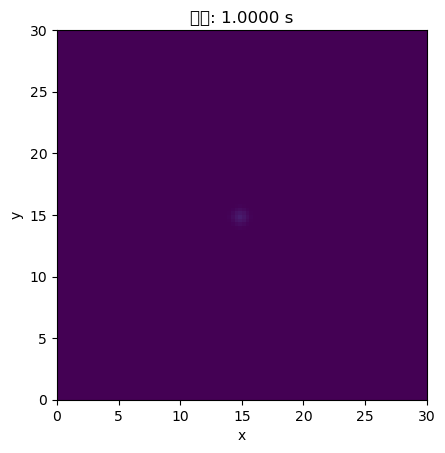

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

class DiffusionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("污染物擴散模擬")

        # 初始參數設置
        self.D = 0.1  # 擴散係數
        self.L = 15.0  # 湖泊邊長
        self.T = 10.0  # 模擬總時間
        self.N = 100  # 網格點數
        self.dt = 0.05  # 時間步長
        self.x_pos = self.L / 2  # 污染物投入位置 x 坐標
        self.y_pos = self.L / 2  # 污染物投入位置 y 坐標

        # 建立輸入框和按鈕
        self.controls_frame = tk.Frame(self.root)
        self.controls_frame.pack(side=tk.TOP, fill=tk.X)

        tk.Label(self.controls_frame, text="湖泊邊長:").pack(side=tk.LEFT)
        self.entry_L = tk.Entry(self.controls_frame, width=5)
        self.entry_L.insert(tk.END, str(self.L))
        self.entry_L.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="擴散係數:").pack(side=tk.LEFT)
        self.entry_D = tk.Entry(self.controls_frame, width=5)
        self.entry_D.insert(tk.END, str(self.D))
        self.entry_D.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="污染物投入位置 x:").pack(side=tk.LEFT)
        self.entry_x_pos = tk.Entry(self.controls_frame, width=5)
        self.entry_x_pos.insert(tk.END, str(self.x_pos))
        self.entry_x_pos.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="污染物投入位置 y:").pack(side=tk.LEFT)
        self.entry_y_pos = tk.Entry(self.controls_frame, width=5)
        self.entry_y_pos.insert(tk.END, str(self.y_pos))
        self.entry_y_pos.pack(side=tk.LEFT)

        self.button_update = tk.Button(self.controls_frame, text="更新", command=self.update_parameters)
        self.button_update.pack(side=tk.LEFT)

        # 繪圖區域
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        # 時間滑條
        self.slider = tk.Scale(self.root, from_=0, to=int(self.T / self.dt) - 1, orient=tk.HORIZONTAL, command=self.update_plot, length=1000)
        self.slider.pack(side=tk.BOTTOM)

        self.calculate_diffusion()
        self.update_plot(0)

    def update_parameters(self):
        self.L = float(self.entry_L.get())
        self.D = float(self.entry_D.get())
        self.x_pos = float(self.entry_x_pos.get())
        self.y_pos = float(self.entry_y_pos.get())
        self.calculate_diffusion()
        self.slider.config(to=int(self.T / self.dt) - 1)
        self.update_plot(0)

    def calculate_diffusion(self):
        # 網格離散化
        self.dx = self.L / (self.N - 1)
        self.dy = self.L / (self.N - 1)
        self.nt = int(self.T / self.dt)

        # 初始濃度場
        self.C = np.zeros((self.N, self.N))
        x_idx = int(self.x_pos / self.dx)
        y_idx = int(self.y_pos / self.dy)
        self.C[y_idx, x_idx] = 1.0  # 釋放點濃度

        # 時間步進求解並保存每個時間步的濃度場
        self.concentration_data = []
        for n in range(self.nt):
            C_new = self.C.copy()
            for i in range(1, self.N - 1):
                for j in range(1, self.N - 1):
                    C_new[i, j] = self.C[i, j] + self.D * self.dt * (
                        (self.C[i + 1, j] - 2 * self.C[i, j] + self.C[i - 1, j]) / self.dx ** 2 +
                        (self.C[i, j + 1] - 2 * self.C[i, j] + self.C[i, j - 1]) / self.dy ** 2
                    )
            self.C = C_new
            self.concentration_data.append(self.C.copy())

    def update_plot(self, val):
        val = int(val)
        self.ax.clear()
        self.ax.imshow(self.concentration_data[val], extent=[0, self.L, 0, self.L], origin='lower', cmap='viridis', vmin=0, vmax=1)
        self.ax.set_title(f'時間: {val * self.dt:.4f} s')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.canvas.draw()

root = tk.Tk()
app = DiffusionApp(root)
root.mainloop()


C:\Users\angus\AppData\Local\Temp\ipykernel_12516\2324882298.py:100: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  self.canvas.draw()
C:\Users\angus\AppData\Local\Temp\ipykernel_12516\2324882298.py:100: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  self.canvas.draw()


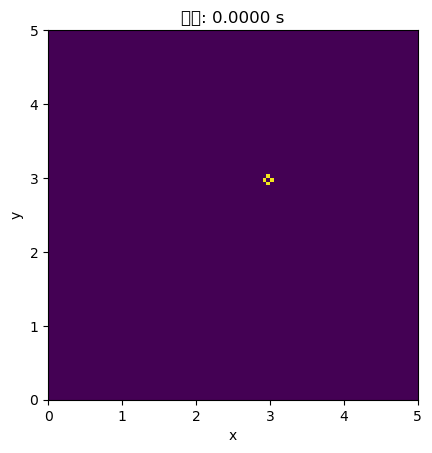

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

class DiffusionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("污染物擴散模擬")

        # 初始參數設置
        self.D = 0.1  # 擴散係數
        self.L = 15.0  # 湖泊邊長
        self.T = 10.0  # 模擬總時間
        self.N = 100  # 網格點數
        self.dt = 0.05  # 時間步長
        self.x_pos = self.L / 2  # 污染物投入位置 x 坐標
        self.y_pos = self.L / 2  # 污染物投入位置 y 坐標

        # 建立輸入框和按鈕
        self.controls_frame = tk.Frame(self.root)
        self.controls_frame.pack(side=tk.TOP, fill=tk.X)

        tk.Label(self.controls_frame, text="湖泊邊長:").pack(side=tk.LEFT)
        self.entry_L = tk.Entry(self.controls_frame, width=5)
        self.entry_L.insert(tk.END, str(self.L))
        self.entry_L.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="擴散係數:").pack(side=tk.LEFT)
        self.entry_D = tk.Entry(self.controls_frame, width=5)
        self.entry_D.insert(tk.END, str(self.D))
        self.entry_D.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="污染物投入位置 x:").pack(side=tk.LEFT)
        self.entry_x_pos = tk.Entry(self.controls_frame, width=5)
        self.entry_x_pos.insert(tk.END, str(self.x_pos))
        self.entry_x_pos.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="污染物投入位置 y:").pack(side=tk.LEFT)
        self.entry_y_pos = tk.Entry(self.controls_frame, width=5)
        self.entry_y_pos.insert(tk.END, str(self.y_pos))
        self.entry_y_pos.pack(side=tk.LEFT)

        self.button_update = tk.Button(self.controls_frame, text="更新", command=self.update_parameters)
        self.button_update.pack(side=tk.LEFT)

        # 繪圖區域
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        # 時間滑條
        self.slider = tk.Scale(self.root, from_=0, to=int(self.T / self.dt) - 1, orient=tk.HORIZONTAL, command=self.update_plot, length=1000)
        self.slider.pack(side=tk.BOTTOM)

        self.calculate_diffusion()
        self.update_plot(0)

    def update_parameters(self):
        self.L = float(self.entry_L.get())
        self.D = float(self.entry_D.get())
        self.x_pos = float(self.entry_x_pos.get())
        self.y_pos = float(self.entry_y_pos.get())
        self.calculate_diffusion()
        self.slider.config(to=int(self.T / self.dt) - 1)
        self.update_plot(0)

    def calculate_diffusion(self):
        # 網格離散化
        self.dx = self.L / (self.N - 1)
        self.dy = self.L / (self.N - 1)
        self.nt = int(self.T / self.dt)

        # 初始濃度場
        self.C = np.zeros((self.N, self.N))
        x_idx = int(self.x_pos / self.dx)
        y_idx = int(self.y_pos / self.dy)
        self.C[y_idx, x_idx] = 1.0  # 釋放點濃度

        # 時間步進求解並保存每個時間步的濃度場
        self.concentration_data = []
        for n in range(self.nt):
            C_new = self.C.copy()
            for i in range(1, self.N - 1):
                for j in range(1, self.N - 1):
                    C_new[i, j] = self.C[i, j] + self.D * self.dt * (
                        (self.C[i + 1, j] - 2 * self.C[i, j] + self.C[i - 1, j]) / self.dx ** 2 +
                        (self.C[i, j + 1] - 2 * self.C[i, j] + self.C[i, j - 1]) / self.dy ** 2
                    )
            self.C = C_new
            self.concentration_data.append(self.C.copy())

    def update_plot(self, val):
        val = int(val)
        self.ax.clear()
        self.ax.imshow(self.concentration_data[val], extent=[0, self.L, 0, self.L], origin='lower', cmap='viridis', vmin=0, vmax=1)
        self.ax.set_title(f'時間: {val * self.dt:.4f} s')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.canvas.draw()

root = tk.Tk()
app = DiffusionApp(root)
root.mainloop()


C:\Users\angus\AppData\Local\Temp\ipykernel_12516\3120123192.py:101: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  self.canvas.draw()
C:\Users\angus\AppData\Local\Temp\ipykernel_12516\3120123192.py:101: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  self.canvas.draw()
C:\Users\angus\AppData\Local\Temp\ipykernel_12516\3120123192.py:101: UserWarning: Glyph 28611 (\N{CJK UNIFIED IDEOGRAPH-6FC3}) missing from current font.
  self.canvas.draw()
C:\Users\angus\AppData\Local\Temp\ipykernel_12516\3120123192.py:101: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  self.canvas.draw()
C:\Users\angus\AppData\Local\Temp\ipykernel_12516\3120123192.py:107: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  self.canvas.draw()
C:\Users\angus\AppData\Local\Temp\ipykernel_12516\3120123192.py:107: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}

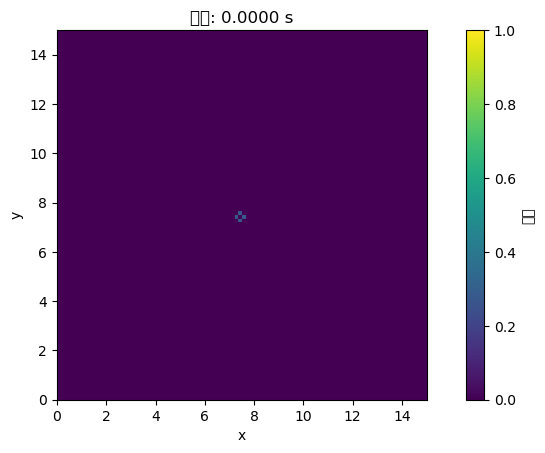

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

class DiffusionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("污染物擴散模擬")

        # 初始參數設置
        self.D = 0.1  # 擴散係數
        self.L = 15.0  # 湖泊邊長
        self.T = 10.0  # 模擬總時間
        self.N = 100  # 網格點數
        self.dt = 0.05  # 時間步長
        self.x_pos = self.L / 2  # 污染物投入位置 x 坐標
        self.y_pos = self.L / 2  # 污染物投入位置 y 坐標

        # 建立輸入框和按鈕
        self.controls_frame = tk.Frame(self.root)
        self.controls_frame.pack(side=tk.TOP, fill=tk.X)

        tk.Label(self.controls_frame, text="湖泊邊長:").pack(side=tk.LEFT)
        self.entry_L = tk.Entry(self.controls_frame, width=5)
        self.entry_L.insert(tk.END, str(self.L))
        self.entry_L.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="擴散係數:").pack(side=tk.LEFT)
        self.entry_D = tk.Entry(self.controls_frame, width=5)
        self.entry_D.insert(tk.END, str(self.D))
        self.entry_D.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="污染物投入位置 x:").pack(side=tk.LEFT)
        self.entry_x_pos = tk.Entry(self.controls_frame, width=5)
        self.entry_x_pos.insert(tk.END, str(self.x_pos))
        self.entry_x_pos.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="污染物投入位置 y:").pack(side=tk.LEFT)
        self.entry_y_pos = tk.Entry(self.controls_frame, width=5)
        self.entry_y_pos.insert(tk.END, str(self.y_pos))
        self.entry_y_pos.pack(side=tk.LEFT)

        self.button_update = tk.Button(self.controls_frame, text="更新", command=self.update_parameters)
        self.button_update.pack(side=tk.LEFT)

        # 繪圖區域
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        # 時間滑條
        self.slider = tk.Scale(self.root, from_=0, to=int(self.T / self.dt) - 1, orient=tk.HORIZONTAL, command=self.update_plot, length=1000)
        self.slider.pack(side=tk.BOTTOM)

        self.calculate_diffusion()
        self.initial_plot()

    def update_parameters(self):
        self.L = float(self.entry_L.get())
        self.D = float(self.entry_D.get())
        self.x_pos = float(self.entry_x_pos.get())
        self.y_pos = float(self.entry_y_pos.get())
        self.calculate_diffusion()
        self.slider.config(to=int(self.T / self.dt) - 1)
        self.update_plot(0)

    def calculate_diffusion(self):
        # 網格離散化
        self.dx = self.L / (self.N - 1)
        self.dy = self.L / (self.N - 1)
        self.nt = int(self.T / self.dt)

        # 初始濃度場
        self.C = np.zeros((self.N, self.N))
        x_idx = int(self.x_pos / self.dx)
        y_idx = int(self.y_pos / self.dy)
        self.C[y_idx, x_idx] = 1.0  # 釋放點濃度

        # 時間步進求解並保存每個時間步的濃度場
        self.concentration_data = []
        for n in range(self.nt):
            C_new = self.C.copy()
            for i in range(1, self.N - 1):
                for j in range(1, self.N - 1):
                    C_new[i, j] = self.C[i, j] + self.D * self.dt * (
                        (self.C[i + 1, j] - 2 * self.C[i, j] + self.C[i - 1, j]) / self.dx ** 2 +
                        (self.C[i, j + 1] - 2 * self.C[i, j] + self.C[i, j - 1]) / self.dy ** 2
                    )
            self.C = C_new
            self.concentration_data.append(self.C.copy())

    def initial_plot(self):
        self.ax.clear()
        self.im = self.ax.imshow(self.concentration_data[0], extent=[0, self.L, 0, self.L], origin='lower', cmap='viridis', vmin=0, vmax=1)
        self.ax.set_title(f'時間: 0.0000 s')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.cbar = self.fig.colorbar(self.im, ax=self.ax)
        self.cbar.set_label('濃度')
        self.canvas.draw()

    def update_plot(self, val):
        val = int(val)
        self.im.set_array(self.concentration_data[val])
        self.ax.set_title(f'時間: {val * self.dt:.4f} s')
        self.canvas.draw()

root = tk.Tk()
app = DiffusionApp(root)
root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\python\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\angus\AppData\Local\Temp\ipykernel_12516\77371117.py", line 72, in update_parameters
    self.calculate_diffusion()
  File "C:\Users\angus\AppData\Local\Temp\ipykernel_12516\77371117.py", line 86, in calculate_diffusion
    self.C[y_idx, x_idx] = 1.0  # 釋放點濃度
    ~~~~~~^^^^^^^^^^^^^^
IndexError: index 148 is out of bounds for axis 0 with size 100


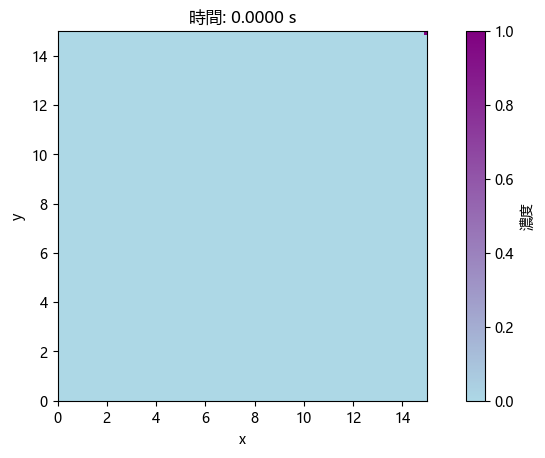

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from matplotlib import font_manager as fm
import matplotlib.colors as mcolors

class DiffusionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("污染物擴散模擬")

        # 初始參數設置
        self.D = 0.1  # 擴散係數
        self.L = 15.0  # 湖泊邊長
        self.T = 10.0  # 模擬總時間
        self.N = 100  # 網格點數
        self.dt = 0.05  # 時間步長
        self.x_pos = self.L / 2  # 污染物投入位置 x 坐標
        self.y_pos = self.L / 2  # 污染物投入位置 y 坐標

        # 建立輸入框和按鈕
        self.controls_frame = tk.Frame(self.root)
        self.controls_frame.pack(side=tk.TOP, fill=tk.X)

        tk.Label(self.controls_frame, text="湖泊邊長:").pack(side=tk.LEFT)
        self.entry_L = tk.Entry(self.controls_frame, width=5)
        self.entry_L.insert(tk.END, str(self.L))
        self.entry_L.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="擴散係數:").pack(side=tk.LEFT)
        self.entry_D = tk.Entry(self.controls_frame, width=5)
        self.entry_D.insert(tk.END, str(self.D))
        self.entry_D.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="污染物投入位置 x:").pack(side=tk.LEFT)
        self.entry_x_pos = tk.Entry(self.controls_frame, width=5)
        self.entry_x_pos.insert(tk.END, str(self.x_pos))
        self.entry_x_pos.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="污染物投入位置 y:").pack(side=tk.LEFT)
        self.entry_y_pos = tk.Entry(self.controls_frame, width=5)
        self.entry_y_pos.insert(tk.END, str(self.y_pos))
        self.entry_y_pos.pack(side=tk.LEFT)

        self.button_update = tk.Button(self.controls_frame, text="更新", command=self.update_parameters)
        self.button_update.pack(side=tk.LEFT)

        # 繪圖區域
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        # 設置中文字體
        font_path = "C:/Windows/Fonts/msyh.ttc"  # 替換為您系統中支持中文的字體文件路徑
        prop = fm.FontProperties(fname=font_path)
        plt.rcParams['font.sans-serif'] = prop.get_name()
        plt.rcParams['axes.unicode_minus'] = False

        # 時間滑條
        self.slider = tk.Scale(self.root, from_=0, to=int(self.T / self.dt) - 1, orient=tk.HORIZONTAL, command=self.update_plot, length=1000)
        self.slider.pack(side=tk.BOTTOM)

        self.calculate_diffusion()
        self.initial_plot()

    def update_parameters(self):
        self.L = float(self.entry_L.get())
        self.D = float(self.entry_D.get())
        self.x_pos = float(self.entry_x_pos.get())
        self.y_pos = float(self.entry_y_pos.get())
        self.calculate_diffusion()
        self.slider.config(to=int(self.T / self.dt) - 1)
        self.update_plot(0)

    def calculate_diffusion(self):
        # 網格離散化
        self.dx = self.L / (self.N - 1)
        self.dy = self.L / (self.N - 1)
        self.nt = int(self.T / self.dt)

        # 初始濃度場
        self.C = np.zeros((self.N, self.N))
        x_idx = int(self.x_pos / self.dx)
        y_idx = int(self.y_pos / self.dy)
        self.C[y_idx, x_idx] = 1.0  # 釋放點濃度

        # 時間步進求解並保存每個時間步的濃度場
        self.concentration_data = []
        for n in range(self.nt):
            C_new = self.C.copy()
            for i in range(1, self.N - 1):
                for j in range(1, self.N - 1):
                    C_new[i, j] = self.C[i, j] + self.D * self.dt * (
                        (self.C[i + 1, j] - 2 * self.C[i, j] + self.C[i - 1, j]) / self.dx ** 2 +
                        (self.C[i, j + 1] - 2 * self.C[i, j] + self.C[i, j - 1]) / self.dy ** 2
                    )
            self.C = C_new
            self.concentration_data.append(self.C.copy())

    def initial_plot(self):
        self.ax.clear()
        cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", ["lightblue", "purple"])
        self.im = self.ax.imshow(self.concentration_data[0], extent=[0, self.L, 0, self.L], origin='lower', cmap=cmap, vmin=0, vmax=1)
        self.ax.set_title(f'時間: 0.0000 s')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.cbar = self.fig.colorbar(self.im, ax=self.ax)
        self.cbar.set_label('濃度')
        self.canvas.draw()

    def update_plot(self, val):
        val = int(val)
        self.im.set_array(self.concentration_data[val])
        self.ax.set_title(f'時間: {val * self.dt:.4f} s')
        self.canvas.draw()

root = tk.Tk()
app = DiffusionApp(root)
root.mainloop()


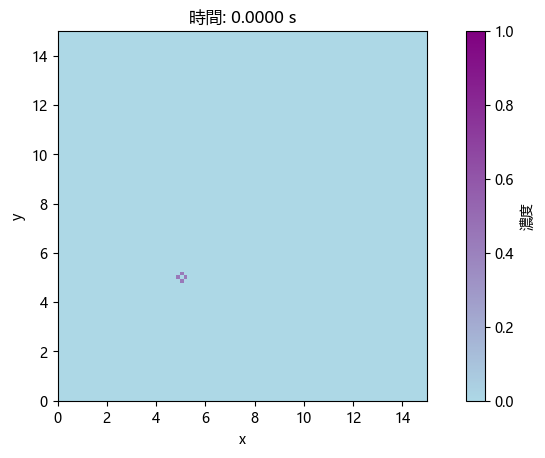

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from matplotlib import font_manager as fm
import matplotlib.colors as mcolors

class DiffusionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("污染物擴散模擬")

        # 初始參數設置
        self.D = 0.1  # 擴散係數
        self.L = 15.0  # 湖泊邊長
        self.T = 10.0  # 模擬總時間
        self.N = 100  # 網格點數
        self.dt = 0.05  # 時間步長
        self.x_pos = self.L / 2  # 污染物投入位置 x 坐標
        self.y_pos = self.L / 2  # 污染物投入位置 y 坐標

        # 建立輸入框和按鈕
        self.controls_frame = tk.Frame(self.root)
        self.controls_frame.pack(side=tk.TOP, fill=tk.X)

        tk.Label(self.controls_frame, text="湖泊邊長:").pack(side=tk.LEFT)
        self.entry_L = tk.Entry(self.controls_frame, width=5)
        self.entry_L.insert(tk.END, str(self.L))
        self.entry_L.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="擴散係數:").pack(side=tk.LEFT)
        self.entry_D = tk.Entry(self.controls_frame, width=5)
        self.entry_D.insert(tk.END, str(self.D))
        self.entry_D.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="污染物投入位置 x:").pack(side=tk.LEFT)
        self.entry_x_pos = tk.Entry(self.controls_frame, width=5)
        self.entry_x_pos.insert(tk.END, str(self.x_pos))
        self.entry_x_pos.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="污染物投入位置 y:").pack(side=tk.LEFT)
        self.entry_y_pos = tk.Entry(self.controls_frame, width=5)
        self.entry_y_pos.insert(tk.END, str(self.y_pos))
        self.entry_y_pos.pack(side=tk.LEFT)

        self.button_update = tk.Button(self.controls_frame, text="更新", command=self.update_parameters)
        self.button_update.pack(side=tk.LEFT)

        # 繪圖區域
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        # 設置中文字體
        font_path = "C:/Windows/Fonts/msyh.ttc"  # 替換為您系統中支持中文的字體文件路徑
        prop = fm.FontProperties(fname=font_path)
        plt.rcParams['font.sans-serif'] = prop.get_name()
        plt.rcParams['axes.unicode_minus'] = False

        # 時間滑條
        self.slider = tk.Scale(self.root, from_=0, to=int(self.T / self.dt) - 1, orient=tk.HORIZONTAL, command=self.update_plot, length=1000)
        self.slider.pack(side=tk.BOTTOM)

        self.calculate_diffusion()
        self.initial_plot()

    def update_parameters(self):
        self.L = float(self.entry_L.get())
        self.D = float(self.entry_D.get())
        self.x_pos = float(self.entry_x_pos.get())
        self.y_pos = float(self.entry_y_pos.get())
        self.calculate_diffusion()
        self.slider.config(to=int(self.T / self.dt) - 1)
        self.update_plot(0)

    def calculate_diffusion(self):
        # 網格離散化
        self.dx = self.L / (self.N - 1)
        self.dy = self.L / (self.N - 1)
        self.nt = int(self.T / self.dt)


        # 初始濃度場
        self.C = np.zeros((self.N, self.N))
        x_idx = int(self.x_pos / self.dx)
        y_idx = int(self.y_pos / self.dy)
        self.C[y_idx, x_idx] = 1.0  # 釋放點濃度

        # 時間步進求解並保存每個時間步的濃度場
        self.concentration_data = []
        for n in range(self.nt):
            C_new = self.C.copy()
            for i in range(1, self.N - 1):
                for j in range(1, self.N - 1):
                    C_new[i, j] = self.C[i, j] + self.D * self.dt * (
                        (self.C[i + 1, j] - 2 * self.C[i, j] + self.C[i - 1, j]) / self.dx ** 2 +
                        (self.C[i, j + 1] - 2 * self.C[i, j] + self.C[i, j - 1]) / self.dy ** 2
                    )
            # 設置邊界條件為零
            C_new[0, :] = C_new[-1, :] = 0
            C_new[:, 0] = C_new[:, -1] = 0

            self.C = C_new
            self.concentration_data.append(self.C.copy())

    def initial_plot(self):
        self.ax.clear()
        cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", ["lightblue", "purple"])
        self.im = self.ax.imshow(self.concentration_data[0], extent=[0, self.L, 0, self.L], origin='lower', cmap=cmap, vmin=0, vmax=1)
        self.ax.set_title(f'時間: 0.0000 s')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        if hasattr(self, 'cbar'):
            self.cbar.remove()
        self.cbar = self.fig.colorbar(self.im, ax=self.ax)
        self.cbar.set_label('濃度')
        self.canvas.draw()

    def update_plot(self, val):
        val = int(val)
        self.im.set_array(self.concentration_data[val])
        self.im.set_extent([0, self.L, 0, self.L])
        self.ax.set_title(f'時間: {val * self.dt:.4f} s')
        self.canvas.draw()

root = tk.Tk()
app = DiffusionApp(root)
root.mainloop()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from matplotlib import font_manager as fm
import matplotlib.colors as mcolors

class DiffusionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("污染物擴散模擬")

        # 初始參數設置
        self.D = 0.1  # 擴散係數
        self.L = 15.0  # 湖泊邊長
        self.T = 10.0  # 模擬總時間
        self.N = 100  # 網格點數
        self.dt = 0.05  # 時間步長
        self.x_pos = self.L / 2  # 污染物投入位置 x 坐標
        self.y_pos = self.L / 2  # 污染物投入位置 y 坐標

        # 建立輸入框和按鈕
        self.controls_frame = tk.Frame(self.root)
        self.controls_frame.pack(side=tk.TOP, fill=tk.X)

        tk.Label(self.controls_frame, text="湖泊邊長:").pack(side=tk.LEFT)
        self.entry_L = tk.Entry(self.controls_frame, width=5)
        self.entry_L.insert(tk.END, str(self.L))
        self.entry_L.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="擴散係數:").pack(side=tk.LEFT)
        self.entry_D = tk.Entry(self.controls_frame, width=5)
        self.entry_D.insert(tk.END, str(self.D))
        self.entry_D.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="污染物投入位置 x:").pack(side=tk.LEFT)
        self.entry_x_pos = tk.Entry(self.controls_frame, width=5)
        self.entry_x_pos.insert(tk.END, str(self.x_pos))
        self.entry_x_pos.pack(side=tk.LEFT)

        tk.Label(self.controls_frame, text="污染物投入位置 y:").pack(side=tk.LEFT)
        self.entry_y_pos = tk.Entry(self.controls_frame, width=5)
        self.entry_y_pos.insert(tk.END, str(self.y_pos))
        self.entry_y_pos.pack(side=tk.LEFT)

        self.button_update = tk.Button(self.controls_frame, text="更新", command=self.update_parameters)
        self.button_update.pack(side=tk.LEFT)

        # 繪圖區域
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        # 設置中文字體
        font_path = "C:/Windows/Fonts/msyh.ttc"  # 替換為您系統中支持中文的字體文件路徑
        prop = fm.FontProperties(fname=font_path)
        plt.rcParams['font.sans-serif'] = prop.get_name()
        plt.rcParams['axes.unicode_minus'] = False

        # 時間滑條
        self.slider = tk.Scale(self.root, from_=0, to=int(self.T / self.dt) - 1, orient=tk.HORIZONTAL, command=self.update_plot, length=1000)
        self.slider.pack(side=tk.BOTTOM)

        self.calculate_diffusion()
        self.initial_plot()

    def update_parameters(self):
        self.L = float(self.entry_L.get())
        self.D = float(self.entry_D.get())
        self.x_pos = float(self.entry_x_pos.get())
        self.y_pos = float(self.entry_y_pos.get())
        self.calculate_diffusion()
        self.slider.config(to=int(self.T / self.dt) - 1)
        self.update_plot(0)

    def calculate_diffusion(self):
        # 網格離散化
        self.dx = self.L / (self.N - 1)
        self.dy = self.L / (self.N - 1)
        self.nt = int(self.T / self.dt)

        # 初始濃度場
        self.C = np.zeros((self.N, self.N))
        x_idx = int(self.x_pos / self.dx)
        y_idx = int(self.y_pos / self.dy)
        self.C[y_idx, x_idx] = 1.0  # 釋放點濃度

        # 時間步進求解並保存每個時間步的濃度場
        self.concentration_data = []
        for n in range(self.nt):
            C_new = self.C.copy()
            for i in range(1, self.N - 1):
                for j in range(1, self.N - 1):
                    C_new[i, j] = self.C[i, j] + self.D * self.dt * (
                        (self.C[i + 1, j] - 2 * self.C[i, j] + self.C[i - 1, j]) / self.dx ** 2 +
                        (self.C[i, j + 1] - 2 * self.C[i, j] + self.C[i, j - 1]) / self.dy ** 2
                    )
            # 設置邊界條件為零
            C_new[0, :] = C_new[-1, :] = 0
            C_new[:, 0] = C_new[:, -1] = 0

            self.C = C_new
            self.concentration_data.append(self.C.copy())

    def initial_plot(self):
        self.ax.clear()
        # 定義自定義色圖
        cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", ["#add8e6", "red"])
        self.im = self.ax.imshow(self.concentration_data[0], extent=[0, self.L, 0, self.L], origin='lower', cmap=cmap, vmin=0, vmax=1)
        self.ax.set_title(f'時間: 0.0000 s')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        if hasattr(self, 'cbar'):
            self.cbar.remove()
        self.cbar = self.fig.colorbar(self.im, ax=self.ax)
        self.cbar.set_label('濃度')
        self.canvas.draw()

    def update_plot(self, val):
        val = int(val)
        self.im.set_array(self.concentration_data[val])
        self.im.set_extent([0, self.L, 0, self.L])
        self.ax.set_title(f'時間: {val * self.dt:.4f} s')
        self.canvas.draw()

root = tk.Tk()
app = DiffusionApp(root)
root.mainloop()
